In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

# Numerical Types
Numpy gives us a rich set of types. usually in the name it says how many bits are needed to store the value.


In [ ]:
print (np.int8(1))
print (np.int16(300))
print (np.int8(300)) # 8 bits can only hold 0 to 255

In [ ]:
print (np.int8(1).itemsize)
print (np.int16(300).itemsize)


# Underlying Byte Array
Python list is a very big object as each element has an overhead of pointers. Numpy uses a ndarray (bytearray). Behind the scenes, the array is always one dimensional. The array's metadata is a set of flags and properties that actually make the array what it is.
* `size` is the actual number of elements in the array.
* `shape` is how many elements on each dimension, while `ndim` is the number of dimensions.
* an array can only have one `dtype`.
* `strides` are how many bytes of data the pointer needs to go, for the next element in each dimension.
![ndarray](https://docs.scipy.org/doc/numpy/_images/threefundamental.png)


In [ ]:
d1 = np.arange(16, dtype=np.int8)
d1

In [ ]:
def info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print(f'data type: {a.dtype} with item size {a.itemsize}')
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)

In [ ]:
d1 = np.arange(16,dtype=np.int8)
info(d1)
print (d1)

In [ ]:
d2 = d1.reshape(4,-1)
info(d2)
print(d2)

* `OWNDATA` for d2 is false.
* `strides` has `ndim` number of elements.

## View

In [ ]:
d16 = np.array([[1,300],[5,10]], dtype='int16')
d16

In [ ]:
info(d16) # Notice how strides is changed

We can view this array, on how it is "broken" into int8 "parts". Notice that int8 can get up to 255. so 300 needs to be represtend as two int8 "parts" - `1*256 + 44*1`

In [ ]:
d16.view(np.int8)

But we can also "squash" them into int32

In [ ]:
d16.view(np.int32)

In [ ]:
print (300 * 2 ** 16+44)
print (10 * 2 ** 16 + 5)

## Slicing 

In [ ]:
d3 = d2[::2,:3]

In [ ]:
info(d3)
print(d3)

In [ ]:
d3.base

In [ ]:
d3[0] = 40

In [ ]:
d2

# Broadcasting

In [ ]:
d3_3 = np.arange(9).reshape(3,3)
d3_1 = np.arange(100,400,100).reshape(3,1)
print(d3_3.shape)
print(d3_1.shape)

In [ ]:
d3_3 + d3_1

It works. But why?  
In numpy, if an axis has a size of 1, it can be broadcasted.

In [ ]:
d3_1

In [ ]:
d3_1_broad = np.broadcast_to(d3_1, (3,3))
d3_1_broad 

## 🤯 Moment
It seemd like data has been duplicated. But was it?

In [ ]:
info(d3_1)

In [ ]:
info(d3_1_broad)

## Padding
numpy know how to add `(3,3)` with `(3,1)`. But it can also add shape `(3,3)` with `(3,)`. This is due to paddin. if two arrays don't have the same `ndim`, numpy add a dimension from the left (left pad).

In [ ]:
d3_ = np.array([100,200,300])
print (d3_.shape)

In [ ]:
d3_3 + d3_

This add the array to each column. `(3,)` was padded as `(1,3)`, which means the broadcasting went "down" instead of "right".

# Stride Tricks

In [ ]:
from numpy.lib.stride_tricks import as_strided

In [ ]:
d1

In [ ]:
# reshape
as_strided(d1, (4,4), (4,1))

In [ ]:
# Transpose - Flip the strides
as_strided(d2, (4,4), (1,4))

## Handle with care
Avoid reading garbage from after the array's end.

In [ ]:
as_strided(d2, (4,4), (8,1))

## Sliding Window with stride tricks.

In [ ]:
arr = np.arange(100) + np.random.rand(100,) * 20

plt.plot(arr)
info(arr)

In [ ]:
d1 = np.arange(16)

In [ ]:
# d1 sliding window 3
new_shape = (16-3+1, 3)
s = 8
new_stride = (8,8)
as_strided(d1, new_shape, new_stride)

In [ ]:
# Sliding window
def sliding_window(a, window):
    new_shape = (len(a) - window + 1, window)
    s = a.strides[0]
    new_stride = (s, s)
    return as_strided(a, new_shape, new_stride)
sliding_window(d1, 3) # Check it

In [ ]:
# smooth
def smooth(a, window=3):
    sw = sliding_window(a, window)
    return sw.mean(axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(arr, linewidth=1, linestyle='--')
ax.plot(np.pad(smooth(arr,11),5, mode='edge'), linewidth=2)

# Edge Detection
Edge detection is done by taking a sliding window of 3x3 and multiplying by the filter: 
```
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]```
 
**Example:**
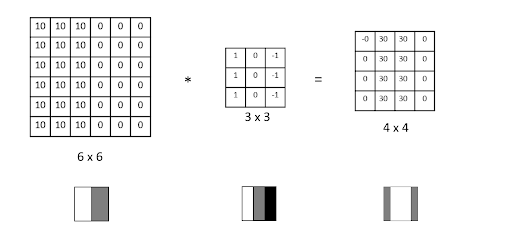

Load the Image

In [ ]:
img = np.loadtxt('../rsrc/tbilisi.npy')

fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(img,cmap='Greys')

In [ ]:
new_img = np.pad(img,10)
fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(new_img,cmap='Greys')

In [ ]:
d2 = np.arange(16).reshape(4,4) + 1
d2

In [ ]:
# ex
# Write a sliding window function
def sliding_window_2d(img, window):
    pass # Your Code Here
sw = sliding_window_2d(d2, 3)
print (sw.shape)

print (sw.mean(axis=-1).mean(axis=-1))

In [ ]:
new_img = sliding_window_2d(img,7)
print(new_img.shape)
print(img.shape)

In [ ]:
new_img = new_img.mean(axis=-1).mean(axis=-1)
print(new_img.shape)
fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(new_img,cmap='Greys')

In [ ]:
new_img = sliding_window_2d(img,3)
new_img.shape

In [ ]:
filt = (np.array([[1,0,-1],[1,0,-1],[1,0,-1]]))
print (filt.shape)
print(filt)

In [ ]:
new_img = sliding_window_2d(img,3)
print(new_img.shape)
new_img = new_img * filt
# "Flatten"
new_img = new_img.sum(axis=-1).sum(axis=-1)
# Normalize
new_img = (new_img - new_img.min())
new_img /=  new_img.max()

In [ ]:
fix, ax = plt.subplots(figsize=(16,9))


print(new_img.min(),new_img.max())
ax.imshow(new_img,cmap='Greys')

# Wrap it Up
[REF](https://jessicastringham.net/2017/12/31/stride-tricks/)

In [ ]:
def filter_image(img, filt):
    window, c = filt.shape
    assert window == c, "Filter should be square"
    new_img = sliding_window_2d(img, window)
    new_img = new_img * filt
    # "Flatten"
    new_img = new_img.sum(axis=-1).sum(axis=-1)
    # Normalize
    new_img = (new_img - new_img.min())
    new_img /=  new_img.max()
    return new_img    

def draw(img):
    fix, ax = plt.subplots(figsize=(16,9))
    ax.imshow(img,cmap='Greys')
    plt.show()


In [ ]:
draw(filter_image(img, filt))

In [ ]:
draw(filter_image(img, filt.T))

In [ ]:
draw(img)

In [ ]:
filt2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])
draw(filter_image(img, filt2))

In [ ]:
draw(img[::4,::4])

In [ ]:
smooth_mean = np.array([
   [0. , 0. , 0.5, 0. , 0. ],
   [0. , 0.5, 1. , 0.5, 0. ],
   [0.5, 1. , 2. , 1. , 0.5],
   [0. , 0.5, 1. , 0.5, 0. ],
   [0. , 0. , 0.5, 0. , 0. ]
])
(smooth_mean)

In [ ]:
draw(filter_image(img, smooth_mean))